<a href="https://colab.research.google.com/github/yuna1998/datamining/blob/main/chapter3_20210926.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## MNIST : 손으로 쓴 70,000개의 작은 숫자 이미지

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version = 1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
##사이킷런에서 읽어 들인 데이터셋들은 일반적으로 dic 구조로 되어 있음

In [6]:
import sklearn

In [7]:
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

In [9]:
## 그림 저장할 위치 선정
project_root_dir = "."

In [10]:
chapter_id = "classification"

In [11]:
images_path = os.path.join(project_root_dir, "images", chapter_id)

In [12]:
os.makedirs(images_path, exist_ok = True)

In [13]:
def save_fig(fig_id, tight_layout = True, fig_extension = "png", resolution = 300):
    path = os.path.join(images_path, fig_id + "." + fig_extension)
    print("그림 저장: ", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)

In [14]:
## mnist의 배열
X, y = mnist['data'], mnist['target']

In [15]:
X.shape

(70000, 784)

In [16]:
y.shape

(70000,)

In [17]:
28*28

784

In [18]:
## 70000개의 images가 있고, 784개의 특성이 있음.
## 샘플의 특성 벡터를 추출해 28 * 28 배열로 크기를 바꾸고 imshow 이용해 그리기

그림 저장:  some_digit_plot


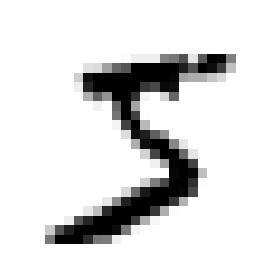

In [19]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [20]:
## 그림으로 보면 5처럼 보임.
## 실제 레이블 확인
y[0]

'5'

In [21]:
## 레이블은 문자열. 숫자로 보이길 원하므로 -> y를 정수로 변환
y = y.astype(np.uint8)

In [22]:
## train, test set 분리
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [23]:
## ex) 숫자 5만 식별. 
## 5임, 5가 아님 -> 이진법
y_train_5 = (y_train ==5) # 5는 true, else는 false
y_test_5 = (y_test ==5)

In [24]:
## 숫자 그림이 어떻게 생겼는지 확인!
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

그림 저장:  more_digits_plot


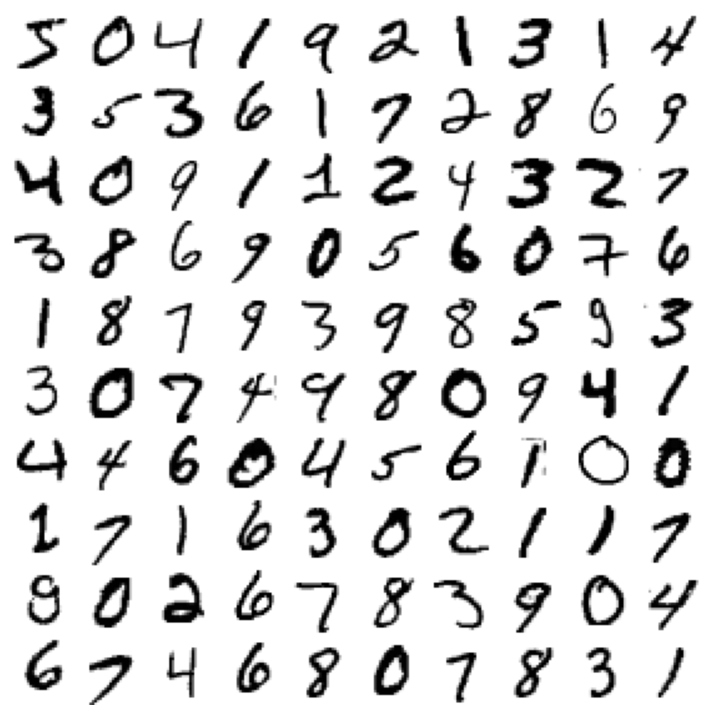

In [25]:
plt.figure(figsize = (10,10))
example_images = X[:100]
plot_digits(example_images, images_per_row = 10)
save_fig("more_digits_plot")
plt.show()

In [26]:
##분류 모델 : 확률적 경사 하강법
from sklearn.linear_model import SGDClassifier

In [27]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
## SGDClassifier는 훈련하는 데 무작위성 사용함. 결과 재현 위해서는 random_stat 매개변수 지정
sgd_clf.predict([some_digit])

array([ True])

In [29]:
## 모델의 성능 측정
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [30]:
sgd_clf = SGDClassifier(max_iter = 1000, tol = 1e-3, random_state = 42)

In [31]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
## cross_val_scroe 활용해 교차검증
from sklearn.model_selection import cross_val_score

In [33]:
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [34]:
## 모든 fold에 대해 정확도가 95% 이상임. 
## 모든 image 5임 5아님으로 나누는 분류기 만들기
from sklearn.base import BaseEstimator

In [35]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        return self
    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)

In [36]:
## 모델의 정확도 추측
never_5_clf = Never5Classifier()

In [37]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [38]:
## 3개의 fold에 대해 정확도 90% 이상.
## 분류기의 성능을 평가하는 더 좋은 방법은 오차행렬을 조사하는 것임.
## 오차행렬 만들려면 실제 타깃과 비교할 수 있도록 예측값 만들어야 함. 
from sklearn.model_selection import cross_val_predict

In [39]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [42]:
y_train_perfect_predictions = y_train_5 #완벽한 분류기일 경우

In [43]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [44]:
## 정밀도와 재현율
from sklearn.metrics import precision_score, recall_score

In [45]:
precision_score(y_train_5, y_train_pred) 

0.8370879772350012

In [46]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [47]:
## 정밀도와 재현율 그렇게 좋지 않음.
## F1 scroe 활용해 보자
from sklearn.metrics import f1_score

In [48]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [49]:
## predict 대신 decision_function 이용하면 각 샘플의 점수를 얻을 수 있음. -> 이 점수를 기반으로 임곗값 정하기
y_scores = sgd_clf.decision_function([some_digit])

In [50]:
y_scores

array([2164.22030239])

In [51]:
threshold = 0

In [52]:
y_some_digit_pred = (y_scores > threshold)

In [53]:
y_some_digit_pred

array([ True])

In [54]:
## SGDClassifier의 임곗값이 0 -> predict 메서드와 같은 결과를 냄
## threshodl값이 증가한다면?
threshold = 8000

In [55]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [56]:
## 적절한 임곗값 설정 -> corss_val_predict 사용해 모든 샘플의 점수 구함
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")

In [57]:
from sklearn.metrics import precision_recall_curve

In [58]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

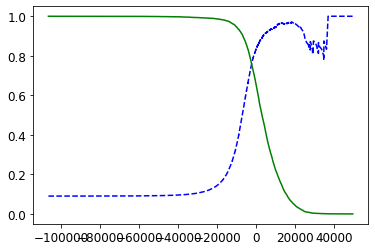

In [59]:
## 정밀도, 재현율 그리기
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "정밀도")
    plt.plot(thresholds, recalls[:-1], "g-", label = "재현율")
    [...] # 임곗값 표시, 범례, 축 이름, 그리드 추가

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [60]:
## 목표는 정밀도 90% 달성!!
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [61]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [62]:
## 정밀도와 재현율
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [63]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [64]:
##ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thesholds = roc_curve(y_train_5, y_scores)

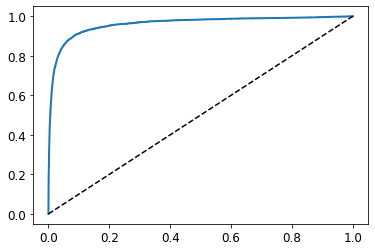

In [65]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1],[0,1],'k--') ## 대각 점선

plot_roc_curve(fpr, tpr)
plt.show()

In [66]:
## AUC
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [67]:
## RandomForestClassifier 훈련해 ROC Curve와 AUC 비교
from sklearn.ensemble import RandomForestClassifier


In [68]:
forest_clf = RandomForestClassifier(random_state = 42)

In [69]:
y_probs_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = "predict_proba")

In [70]:
y_scores_forest = y_probs_forest[:,1] # 양성 클래스에 대한 확률을 점수로 사용

In [71]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

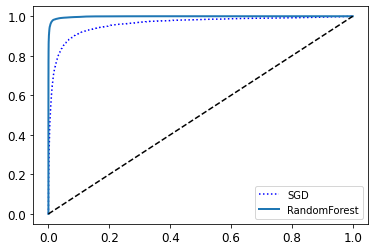

In [72]:
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "RandomForest")
plt.legend(loc = "lower right")
plt.show()

In [73]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [74]:
## 다중 분류기 만들기
## mnist 문제에서는 45개의 분류기를 훈련해야 한다는 단점이 있음
from sklearn.svm import SVC

In [75]:
svm_clf = SVC()

In [76]:
svm_clf.fit(X_train, y_train) ## 이 땐 y_train_5 사용하는것 아님
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [77]:
## decision_function() 호출하면 샘플 당 10개의 점수 반환함
some_digit_scores = svm_clf.decision_function([some_digit])

In [78]:
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [79]:
np.argmax(some_digit_scores)

5

In [80]:
## 5번째 클래스가 가장 높음
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [81]:
svm_clf.classes_[5]

5

In [82]:
## 사이킷런에서 OvO나 OvR 사용하게 하려면 OneVsOneClassifier 나 OneVsRestClassifier 사용
from sklearn.multiclass import OneVsRestClassifier

In [83]:
ovr_clf = OneVsRestClassifier(SVC())

In [84]:
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [85]:
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [86]:
len(ovr_clf.estimators_)

10

In [87]:
## SGDClassifier로 훈련
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [88]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [89]:
## 클래스마다 부여한 점수 확인
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [90]:
## 모델의 정확도 평가
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [91]:
## 모든 fold에서 85% 이상의 설명력을 보임
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()

In [93]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [94]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.8983, 0.891 , 0.9018])

In [95]:
## 에러 분석
## corss_val_predict 이용해 예측 만듦 -> confusion matrix 활용
y_train_ped = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)

In [96]:
conf_mx = confusion_matrix(y_train, y_train_ped)

In [97]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

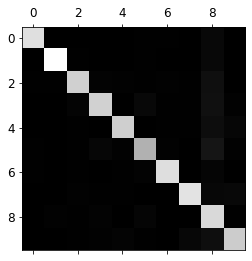

In [98]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()
# 이미지로 표현

In [99]:
## 행렬의 각 값을 대응되는 클래스의 이미지 개수로 나눠 에러 비율 비교
row_sums = conf_mx.sum(axis = 1, keepdims = True)

In [100]:
norm_conf_mx = conf_mx / row_sums

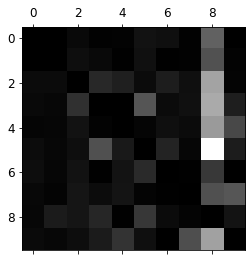

In [101]:
## 다른 항목은 그래도 유지하고 주대각선만 0으로 채워 그래프 그리기
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

In [102]:
## 행 : 실제 클래스, 열 : 예측한 클래스
## 클래스 8열이 밝음 -> 예측이 잘못 되었음. 

In [103]:
## 다중 레이블 분류
from sklearn.neighbors import KNeighborsClassifier

In [104]:
y_train_large = (y_train >= 7)

In [105]:
y_train_odd = (y_train %2 ==1)

In [106]:
y_multilabel = np.c_[y_train_large, y_train_odd]

In [107]:
knn_clf = KNeighborsClassifier()

In [108]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [109]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [110]:
## 각 레이블의 F1 점수 구하고 평균 계산
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)

In [111]:
f1_score(y_multilabel, y_train_knn_pred, average = "macro")

0.976410265560605

In [112]:
## 다중출력 분류
noise = np.random.randint(0,100, (len(X_train), 784))

In [113]:
X_train_mod = X_train + noise

In [114]:
noise = np.random.randint(0,100,(len(X_test), 784))

In [115]:
X_test_mod = X_test + noise

In [116]:
y_train_mod = X_train

In [117]:
y_test_mod = X_test

In [118]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [119]:
some_index = 0

In [120]:
clean_digit = knn_clf.predict([X_test_mod[some_index]])

In [121]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

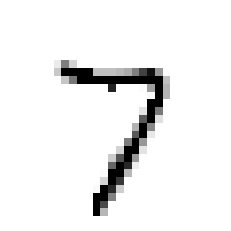

In [122]:
plot_digit(clean_digit)

In [123]:
## 연습문제 1
## 97% 정확도
from sklearn.model_selection import GridSearchCV

In [124]:
param_grid = [
              {'weights' : ['uniform','distance'], 'n_neighbors':[3,4,5]}
]

In [125]:
knn_clf = KNeighborsClassifier()

In [126]:
grid_search = GridSearchCV(knn_clf, param_grid, cv = 5, verbose = 3)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=3, weights=uniform, score=0.972, total=17.0min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 17.0min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.971, total=16.8min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 33.8min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.969, total=16.7min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.969, total=16.7min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.970, total=16.7min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.972, total=16.7min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.972, total=16.7min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.970, total=16.7min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.970, total=16.7min
[CV] n_neighbors=3, weights=distance .................................
[CV] .

In [ ]:
grid_search.best_params_ ## 최적의 파라미터 찾음

In [ ]:
grid_search.best_score ## 최고의 score

In [ ]:
from sklearn.metrics import accuracy_scroe

In [ ]:
y_pred = grid_search.predict(X_test) ## X_test data로 pred값 찾음

In [ ]:
accuracy_score(y_test, y_pred)

In [1]:
import os

In [2]:
## 타이타닉 data


In [3]:
import pandas as pd

In [14]:
test_data = pd.read_csv("/content/test (2).csv")

In [20]:
train_data = pd.read_csv("/content/train (2).csv")

In [21]:
train_data.head(5) ## train_data의 유형 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
train_data.info() ## null값 갯수 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [24]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [25]:
##Survived는 0과 1로 구서오디어 있음.
##Pclass는 범주형(1,2,3)
##Sex는 범주형 (male, female)
##Embarked는 범주형 (S,C,Q)

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

In [31]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
from sklearn.impute import SimpleImputer

In [32]:
num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", SimpleImputer(strategy="median")),
    ])
## 숫자 특성 

In [33]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [34]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)
##문자열 범주형을 위한 pipeline

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
## 범주형 특성을 위한 pipeline
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [37]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [38]:
## 위에서 만든 숫자형 pipeline과 범주형 pipeline 서로 연결
from sklearn.pipeline import FeatureUnion

In [39]:
preprocess_pipeline = FeatureUnion(transformer_list = [
                                                       ('num_pipeline', num_pipeline),
                                                       ('cat_pipeline', cat_pipeline)
])

In [40]:
X_train = preprocess_pipeline.fit_transform(train_data)

In [41]:
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [42]:
y_train = train_data['Survived'] ##label 가져와 설정하기

In [43]:
from sklearn.svm import SVC

In [44]:
svm_clf = SVC(gamma = "auto") ## gamma값은 자동으로 설정

In [45]:
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
##test set에 대한 예측
X_test = preprocess_pipeline.transform(test_data)

In [47]:
y_pred = svm_clf.predict(X_test)

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
svm_scroes = cross_val_score(svm_clf, X_train, y_train, cv = 10)

In [51]:
svm_scroes.mean()

0.7329588014981274

In [52]:
## 정확도는 약 73%

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [56]:
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv = 10)

In [57]:
forest_scores.mean()

0.8126466916354558

In [ ]:
## 정확도 81%